# Analysis for Table C for ImageNet

In [1]:
import ast
import copy
import pickle
import random

import numpy as np
import pandas as pd

In [2]:
import shutil
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from torchvision import transforms

sns.set()

/opt/homebrew/Caskroom/miniforge/base/envs/deep36/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

### Orders for Plotting

In [4]:
ORDER_DICT = {
    "ResNet-50": 1,
    "kNN": 2,
    "EMD-NN": 3,
    "EMD-Corr": 4,
    "CHM-NN": 5,
    "CHM-Corr": 6,
}

##  Load summary fo AI Performance

In [5]:
random.seed(42)

with open("../data/Classification-Summary-ImageNet.pickle", "rb") as f:
    classification_summary = pickle.load(f)

In [6]:
classification_summary.keys()

dict_keys(['all_gts', 'resnet_wnid', 'knn_wnid', 'emd_wnid', 'chm_wnid', 'resnet_conf', 'knn_conf', 'emd_conf', 'chm_conf', 'resnet_wnid_real', 'knn_wnid_real', 'emd_wnid_real', 'chm_wnid_real', 'resnet_real_conf', 'knn__real_conf', 'emd__real_conf', 'chm__real_conf'])

### Unpacking

In [7]:
real_gt_real = classification_summary["all_gts"]

resnet_wnid_real = classification_summary["resnet_wnid_real"]
knn_wnid_real = classification_summary["knn_wnid_real"]
emd_wnid_real = classification_summary["emd_wnid_real"]
chm_wnid_real = classification_summary["chm_wnid_real"]

IsM1Correct_real = np.asarray(classification_summary["resnet_wnid_real"])
IsM2Correct_real = np.asarray(classification_summary["knn_wnid_real"])
IsM3Correct_real = np.asarray(classification_summary["emd_wnid_real"])
IsM4Correct_real = np.asarray(classification_summary["chm_wnid_real"])

M1Conf_real = np.asarray(classification_summary["resnet_real_conf"])
M2Conf_real = np.asarray(classification_summary["knn__real_conf"])
M3Conf_real = np.asarray(classification_summary["emd__real_conf"])
M4Conf_real = np.asarray(classification_summary["chm__real_conf"])

## AI Performance Analysis

In [8]:
MethodName = ["ResNet", "KNN", "EMD", "CHM"]
Methods = [IsM1Correct_real, IsM2Correct_real, IsM3Correct_real, IsM4Correct_real]
Confs = [M1Conf_real, M2Conf_real, M3Conf_real, M4Conf_real]

TAnalysis = {}
TCount = {}

for N, M, C in zip(MethodName, Methods, Confs):
    TAnalysis[N] = {}
    TCount[N] = {}

    for T in np.arange(0.0, 1.05, 0.05):
        TAnalysis[N][round(T, 2)] = np.mean(M[C >= T])
        TCount[N][round(T, 2)] = len(M[C >= T])

print("Done")

Done


## AI PERFORMANCE 

In [9]:
ai_df = pd.DataFrame(TAnalysis)
(100 * ai_df)

,ResNet,KNN,EMD,CHM
0.00,83.144246,82.144787,82.390149,82.050243
0.05,83.160715,82.144787,82.390149,82.050243
0.10,83.341611,82.155883,82.397569,82.055784
0.15,83.961425,83.336006,83.630611,83.032920
0.20,84.477365,83.336006,83.630611,83.032920
0.25,85.291440,84.362975,84.720503,83.956350
0.30,86.354748,86.848100,87.119541,86.165855
0.35,87.322607,88.103105,88.365574,87.403772
0.40,88.129755,88.103105,88.365574,87.403772
0.45,89.149732,89.435261,89.586867,88.651899


## Number of Images 

In [10]:
# Number of Images
count_df = pd.DataFrame(TCount)
count_df

,ResNet,KNN,EMD,CHM
0.00,44424,44424,44424,44424
0.05,44414,44424,44424,44424
0.10,44296,44418,44420,44421
0.15,43863,43651,43618,43773
0.20,43472,43651,43618,43773
0.25,42839,42879,42809,43070
0.30,41934,40823,40806,41253
0.35,41081,39649,39598,40139
0.40,40353,39649,39598,40139
0.45,39317,38354,38317,38914


## Ratios (out of 44424 Images)

In [11]:
# RATIOs (out of 44424 Images)
ratio_df = pd.DataFrame(TCount) / len(real_gt_real)
ratio_df

,ResNet,KNN,EMD,CHM
0.00,1.000000,1.000000,1.000000,1.000000
0.05,0.999775,1.000000,1.000000,1.000000
0.10,0.997119,0.999865,0.999910,0.999932
0.15,0.987372,0.982599,0.981857,0.985346
0.20,0.978570,0.982599,0.981857,0.985346
0.25,0.964321,0.965222,0.963646,0.969521
0.30,0.943949,0.918940,0.918558,0.928620
0.35,0.924748,0.892513,0.891365,0.903543
0.40,0.908360,0.892513,0.891365,0.903543
0.45,0.885040,0.863362,0.862529,0.875968


## Human Performance Analysis

In [12]:
summary_df = pd.read_csv("../data/ImageNet-Human-Study-Summary.csv")

## Removing Bad Users 

We manually marked two users as **bad** based on their average performance on `1:1` ratio samples

1. `6395881` 
1. `6396044`


And after resampling we excluded these `4` users:

1. `6386000`
1. `6382894`
1. `6385998`
1. `6382878`

In [13]:
summary_df = summary_df[
    ~summary_df["UID"].isin([6395881, 6396044] + [6386000, 6382894, 6385998, 6382878])
]

In [14]:
print(f"total {len(summary_df)} entries")

total 10620 entries


In [15]:
df_treshold = copy.deepcopy(summary_df[["Method", "Correctness", "ConfidenceScore"]])

## Human Performance

In [16]:
human_accuracy = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_accuracy[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .mean()
    )

In [17]:
humand_df = (
    pd.DataFrame.from_dict(human_accuracy)
    .loc[::-1]
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
    .T
)

humand_df = humand_df.drop("Method")
humand_df.columns = ["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"]
humand_df

,ResNet-50,kNN,EMD-NN,EMD-Corr,CHM-NN,CHM-Corr
0.00,NaN,NaN,NaN,NaN,NaN,NaN
0.05,1.0,NaN,NaN,NaN,NaN,NaN
0.10,1.0,1.0,1.0,1.0,NaN,NaN
0.15,0.890909,0.971429,0.961039,0.952941,0.947368,0.918919
0.20,0.859813,0.971429,0.961039,0.952941,0.947368,0.918919
0.25,0.898204,0.902256,0.952381,0.955696,0.889655,0.869863
0.30,0.924107,0.800643,0.883636,0.892734,0.813725,0.819048
0.35,0.891374,0.778626,0.831135,0.851948,0.805774,0.783505
0.40,0.867347,0.778626,0.831135,0.851948,0.805774,0.783505
0.45,0.846154,0.734021,0.814898,0.825893,0.792208,0.773913


In [18]:
def make_table(ai_group, human_group):
    agg_df = pd.DataFrame()
    agg_df["T"] = humand_df.index
    agg_df["T"] = agg_df["T"].astype(float).apply(lambda x: np.round(x, 2))
    agg_df["Ratio of Images Handled by AI"] = ratio_df[ai_group].values
    
    agg_df["AI Alone Performance"] = ai_df[ai_group].values
    agg_df["Human Performance on Remaining Images"] = humand_df[human_group].values
    agg_df["Aggregated Performance"] = (
        agg_df["Ratio of Images Handled by AI"] * agg_df["AI Alone Performance"]
    ) + (
        (1 - agg_df["Ratio of Images Handled by AI"])
        * agg_df["Human Performance on Remaining Images"]
    )

    agg_df = agg_df.set_index("T")

    agg_df["AI Alone Performance"] = (100 * agg_df["AI Alone Performance"]).round(2)
    agg_df["Human Performance on Remaining Images"] = (
        (100 * agg_df["Human Performance on Remaining Images"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Aggregated Performance"] = (
        (100 * agg_df["Aggregated Performance"])
        .astype(float)
        .apply(lambda x: np.round(x, 2))
    )

    agg_df["Ratio of Images Handled by AI"] = 100*agg_df[
        "Ratio of Images Handled by AI"
    ].round(4)

    return agg_df

In [19]:
make_table("ResNet", "ResNet-50")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,83.14,NaN,NaN
0.05,99.98,83.16,100.00,83.16
0.10,99.71,83.34,100.00,83.39
0.15,98.74,83.96,89.09,84.03
0.20,97.86,84.48,85.98,84.51
0.25,96.43,85.29,89.82,85.45
0.30,94.39,86.35,92.41,86.69
0.35,92.47,87.32,89.14,87.46
0.40,90.84,88.13,86.73,88.00


In [20]:
make_table("KNN", "kNN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,82.14,NaN,NaN
0.05,100.00,82.14,NaN,NaN
0.10,99.99,82.16,100.00,82.16
0.15,98.26,83.34,97.14,83.58
0.20,98.26,83.34,97.14,83.58
0.25,96.52,84.36,90.23,84.57
0.30,91.89,86.85,80.06,86.30
0.35,89.25,88.10,77.86,87.00
0.40,89.25,88.10,77.86,87.00


In [21]:
make_table("EMD", "EMD-NN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,82.39,NaN,NaN
0.05,100.00,82.39,NaN,NaN
0.10,99.99,82.40,100.00,82.40
0.15,98.19,83.63,96.10,83.86
0.20,98.19,83.63,96.10,83.86
0.25,96.36,84.72,95.24,85.10
0.30,91.86,87.12,88.36,87.22
0.35,89.14,88.37,83.11,87.80
0.40,89.14,88.37,83.11,87.80


In [38]:
make_table("EMD", "EMD-Corr")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,82.39,NaN,NaN
0.05,100.00,82.39,NaN,NaN
0.10,99.99,82.40,100.00,82.40
0.15,98.19,83.63,95.29,83.84
0.20,98.19,83.63,95.29,83.84
0.25,96.36,84.72,95.57,85.11
0.30,91.86,87.12,89.27,87.29
0.35,89.14,88.37,85.19,88.02
0.40,89.14,88.37,85.19,88.02


In [39]:
make_table("CHM", "CHM-NN")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,82.05,NaN,NaN
0.05,100.00,82.05,NaN,NaN
0.10,99.99,82.06,NaN,NaN
0.15,98.53,83.03,94.74,83.20
0.20,98.53,83.03,94.74,83.20
0.25,96.95,83.96,88.97,84.11
0.30,92.86,86.17,81.37,85.82
0.35,90.35,87.40,80.58,86.75
0.40,90.35,87.40,80.58,86.75


In [40]:
make_table("CHM", "CHM-Corr")

,Ratio of Images Handled by AI,AI Alone Performance,Human Performance on Remaining Images,Aggregated Performance
T,,,,
0.00,100.00,82.05,NaN,NaN
0.05,100.00,82.05,NaN,NaN
0.10,99.99,82.06,NaN,NaN
0.15,98.53,83.03,91.89,83.16
0.20,98.53,83.03,91.89,83.16
0.25,96.95,83.96,86.99,84.05
0.30,92.86,86.17,81.90,85.86
0.35,90.35,87.40,78.35,86.53
0.40,90.35,87.40,78.35,86.53


## Number of Trials

In [25]:
human_count = {}
for T in np.arange(0.0, 1.05, 0.05):
    human_count[f"{T:0.2f}"] = (
        df_treshold[df_treshold["ConfidenceScore"] < T]
        .groupby("Method")["Correctness"]
        .count()
    )

In [26]:
pd.DataFrame.from_dict(human_count).loc[::-1].reset_index().sort_values(
    by="Method", key=lambda x: x.map(ORDER_DICT)
)

,Method,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
1,ResNet-50,NaN,3.0,16.0,55,107,167,224,313,392,455,543,633,729,800,875,944,996,1072,1145,1292,1797
0,kNN,NaN,NaN,3.0,70,70,133,311,393,393,485,575,653,803,803,915,915,1000,1161,1161,1413,1413
2,EMD-NN,NaN,NaN,2.0,77,77,147,275,379,379,443,550,655,838,838,993,993,1043,1155,1155,1367,1367
3,EMD-Corr,NaN,NaN,3.0,85,85,158,289,385,385,448,576,675,866,866,1025,1025,1079,1189,1189,1407,1407
4,CHM-NN,NaN,NaN,NaN,76,76,145,306,381,381,462,538,643,793,793,948,948,1001,1128,1128,1347,1347
5,CHM-Corr,NaN,NaN,NaN,74,74,146,315,388,388,460,540,638,788,788,940,940,992,1118,1118,1317,1317


# Samples outsourced to the Human group

In [27]:
optimal_T_imagenet = {
    "ResNet-50": 0.65,
    "kNN": 0.4,
    "EMD-NN": 0.45,
    "EMD-Corr": 0.5,
    "CHM-NN": 0.5,
    "CHM-Corr": 0.5,
}

In [28]:
df_for_human = summary_df[summary_df["ConfidenceScore"] < optimal_T_imagenet["kNN"]]

In [29]:
df_for_human.groupby(["Method", "ClassifierCorrectness"])[
    "UID"
].count().reset_index().sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))

,Method,ClassifierCorrectness,UID
8,ResNet-50,0,358
9,ResNet-50,1,34
10,kNN,0,341
11,kNN,1,52
6,EMD-NN,0,359
7,EMD-NN,1,20
4,EMD-Corr,0,368
5,EMD-Corr,1,17
2,CHM-NN,0,346
3,CHM-NN,1,35


In [30]:
dfs = []

for k, v in optimal_T_imagenet.items():
    new_df = summary_df[
        (summary_df["ConfidenceScore"] < v) & (summary_df["Method"] == k)
    ]
    dfs.append(new_df)

In [31]:
df_offloads = pd.concat(dfs, axis=0)

In [32]:
df_difflevel = (
    df_offloads.groupby(["UID", "Method", "DifficultyLevel", "ClassifierCorrectness"])[
        "Correctness"
    ]
    .agg(["count", "sum", "mean"])
    .unstack()
    .stack()
    .reset_index()
    .sort_values(by="Method", key=lambda x: x.map(ORDER_DICT))
)
df_difflevel["mean"] = df_difflevel["mean"] * 100

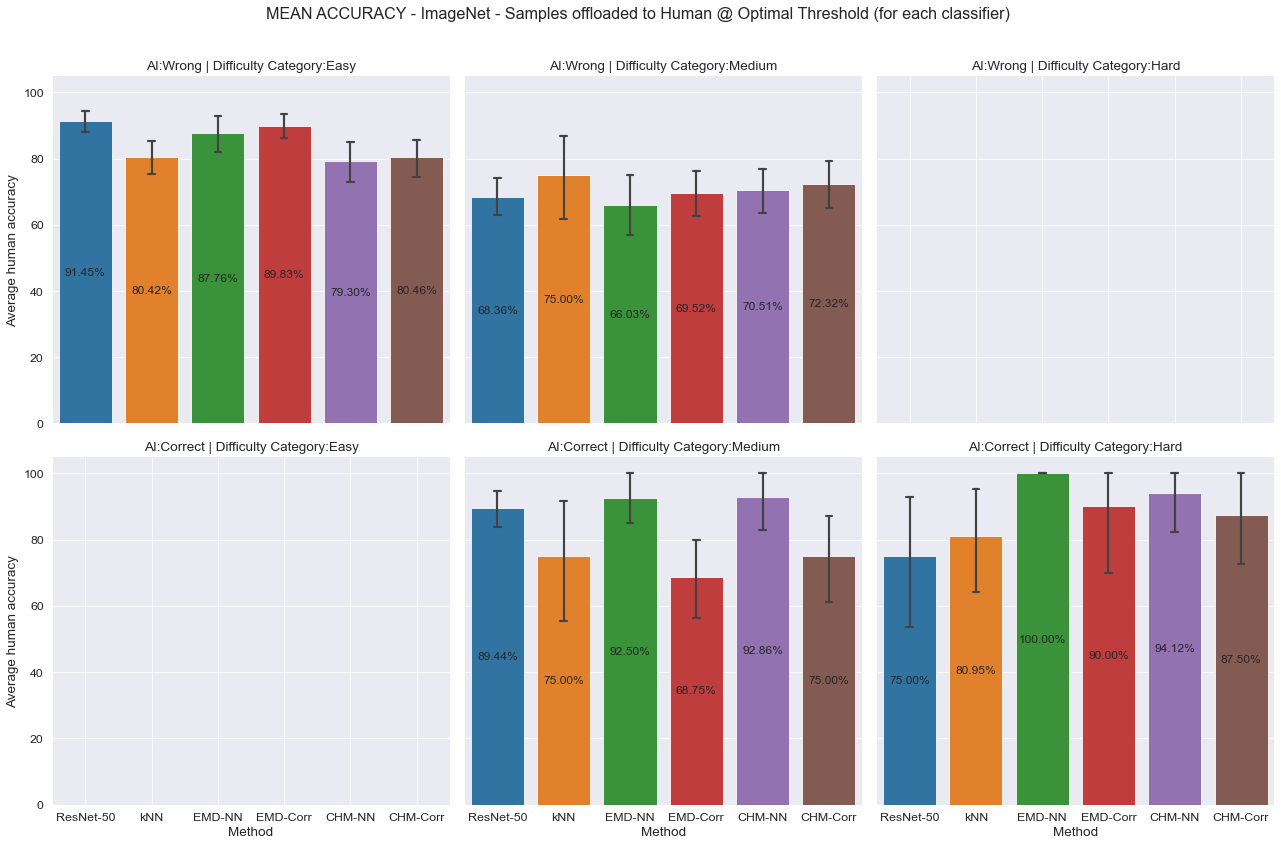

In [33]:
with sns.plotting_context("paper", font_scale=1.4):
    g = sns.FacetGrid(
        df_difflevel,
        col="DifficultyLevel",
        row="ClassifierCorrectness",
        height=6,
        col_order=["Easy", "Medium", "Hard"],
    )
    g.map(
        sns.barplot,
        "Method",
        "mean",
        order=["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"],
        palette="tab10",
        capsize=0.1,
    )

    [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, fmt="%.2f%%", label_type="center")

    plt.ylim(0, 105)

    axes = g.axes.flatten()
    for ci, C in enumerate(["Wrong", "Correct"]):
        for di, D in enumerate(["Easy", "Medium", "Hard"]):
            axes[(ci * 3) + di].set_title(f"AI:{C} | Difficulty Category:{D}")

    axes[0].set_ylabel("Average human accuracy")
    axes[3].set_ylabel("Average human accuracy")

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        "MEAN ACCURACY - ImageNet - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n"
    )

    plt.show()

In [34]:
df_correctness = (
    df_offloads.groupby(["UID", "Method", "ClassifierCorrectness"])["Correctness"]
    .agg(["count", "sum", "mean"])
    .unstack()
    .stack()
    .reset_index()
)
df_correctness["mean"] *= 100

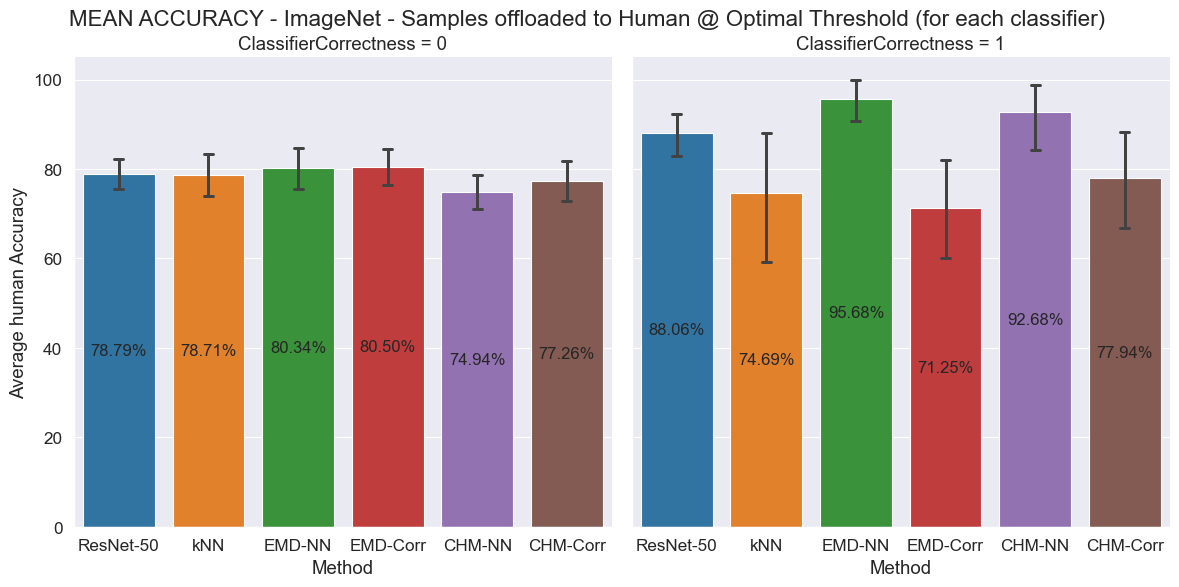

In [35]:
with sns.plotting_context("paper", font_scale=1.4):
    g = sns.FacetGrid(df_correctness, col="ClassifierCorrectness", height=6)
    g.map(
        sns.barplot,
        "Method",
        "mean",
        order=["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"],
        palette="tab10",
        capsize=0.1,
    )

    [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, label_type="center", fmt="%.2f%%")

    axes = g.axes.flatten()
    axes[0].set_ylabel("Average human Accuracy")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        "MEAN ACCURACY - ImageNet - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n"
    )

    plt.show()

In [36]:
df_correctness_count = (
    df_offloads.groupby(["Method", "ClassifierCorrectness"])["UID"]
    .count()
    .reset_index()
)

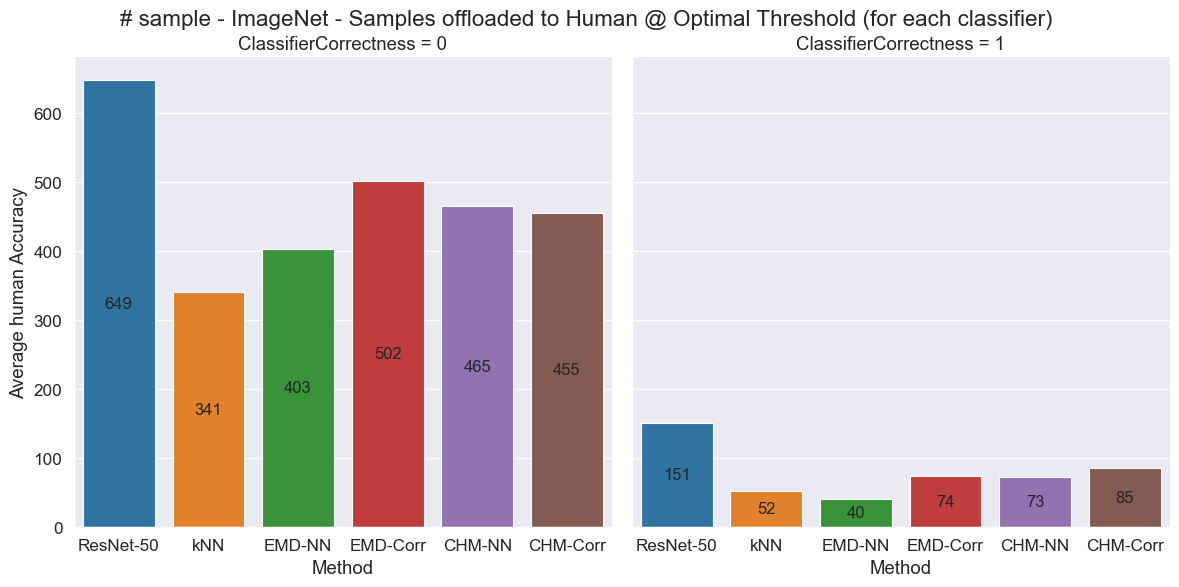

In [37]:
with sns.plotting_context("paper", font_scale=1.4):
    g = sns.FacetGrid(df_correctness_count, col="ClassifierCorrectness", height=6)
    g.map(
        sns.barplot,
        "Method",
        "UID",
        order=["ResNet-50", "kNN", "EMD-NN", "EMD-Corr", "CHM-NN", "CHM-Corr"],
        palette="tab10",
        capsize=0.1,
    )

    [plt.setp(ax.get_xticklabels(), rotation=0) for ax in g.axes.flat]

    for ax in g.axes.flat:
        for container in ax.containers:
            ax.bar_label(container, fontsize=12, label_type="center")

    axes = g.axes.flatten()
    axes[0].set_ylabel("Average human Accuracy")

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(
        "# sample - ImageNet - Samples offloaded to Human @ Optimal Threshold (for each classifier) \n\n"
    )

    plt.show()